In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import statsmodels.formula.api as sm

In [2]:
## Read dataset
data_raw = pd.read_csv("mediadata.csv")
data_raw['YT_PAID_IMP'] = data_raw['YT_PAID_IMP']+data_raw['YT_ORG_IMP']

In [3]:
data_raw[105:120:]

,GEO,WEEK_START,YT_PAID_IMP,YT_ORG_IMP,GOOGLE_IMP,EMAIL_IMP,FB_IMP,AFF_IMP,GOOGLE_SPEND,FB_SPEND,AFF_SPEND,REVENUE
105,A,1/11/20,28399,19361,294204,408193,130872,6109,3865.84,4122.47,70.10,90981
106,A,1/18/20,36540,17990,314118,387120,149976,6948,7746.15,2564.59,145.39,105848
107,A,1/25/20,38481,16855,504923,320358,114312,6684,7361.78,3112.14,201.52,76253
108,A,2/1/20,45168,21028,565733,997443,39280,5686,9470.37,751.23,135.61,72475
109,A,2/8/20,46251,22064,574706,365408,161435,4944,10448.16,2724.22,143.50,77613
110,A,2/15/20,48893,25885,432938,288944,292028,6133,7091.52,9198.88,136.61,168172
111,A,2/22/20,43997,25271,442591,415592,286872,6760,7807.31,9036.47,112.55,119598
112,A,2/29/20,36078,22205,430426,300294,148089,6864,9684.59,1865.92,105.02,99357
113,B,1/6/18,949,782,708,2567848,667172,95360,12.62,20565.58,2209.97,519479
114,B,1/13/18,695,143,441,3715497,103319,82360,5.95,3184.81,963.61,501041


In [4]:
## Data cleanup, if required
data_raw['WEEK_START']=pd.to_datetime(data_raw['WEEK_START'])
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   GEO           3051 non-null   object        
 1   WEEK_START    3051 non-null   datetime64[ns]
 2   YT_PAID_IMP   3051 non-null   int64         
 3   YT_ORG_IMP    3051 non-null   int64         
 4   GOOGLE_IMP    3051 non-null   int64         
 5   EMAIL_IMP     3051 non-null   int64         
 6   FB_IMP        3051 non-null   int64         
 7   AFF_IMP       3051 non-null   int64         
 8   GOOGLE_SPEND  3051 non-null   float64       
 9   FB_SPEND      3051 non-null   float64       
 10  AFF_SPEND     3051 non-null   float64       
 11  REVENUE       3051 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 286.2+ KB


In [5]:
print(data_raw['WEEK_START'].min())
print(data_raw['WEEK_START'].max())
print(np.argmin(data_raw['WEEK_START']))
print(np.argmax(data_raw['WEEK_START']))

2018-01-06 00:00:00
2020-02-29 00:00:00
0
112


In [6]:
data_raw.head(10)
data_raw['GEO'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [7]:
scatter_cols = data_raw.columns[2:]
dependent = scatter_cols[len(scatter_cols)-1]
dependent

'REVENUE'

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


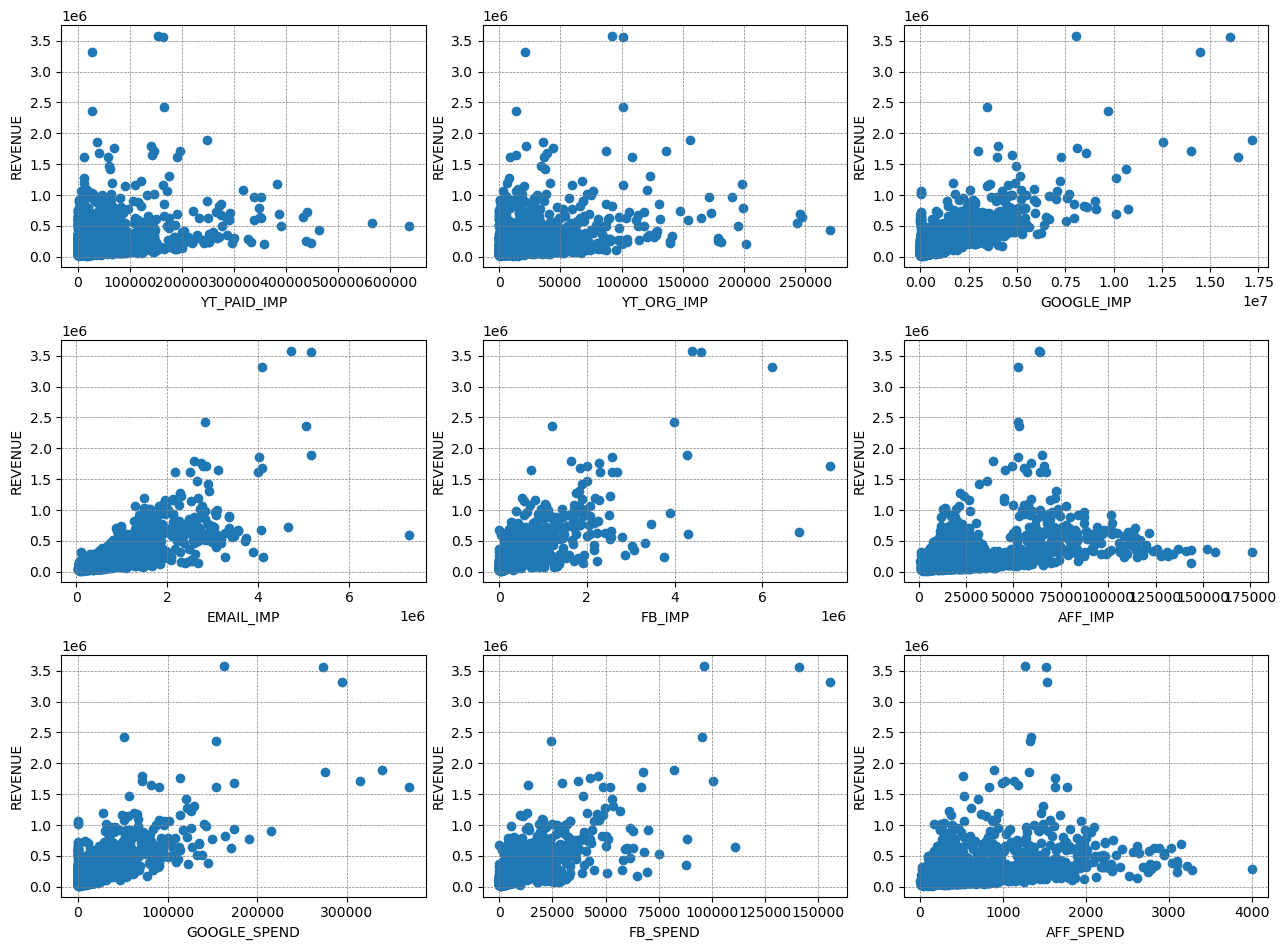

In [8]:
## Exploratory Data Analysis: Marketing channels vs Revenue
from matplotlib import figure
# Creating a grid of subplots
fig = plt.figure()
DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*2) )
# Define a 2x2 grid
gs = GridSpec(3, 3)

#ax = []

# Creating subplots
num = 0
for i in range(3):
    for j in range(3):
        print(i,j)
        ax = fig.add_subplot(gs[i, j])
        ax.scatter(data_raw[scatter_cols[num]], data_raw[dependent])
        ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
        ax.set(xlabel=scatter_cols[num], ylabel=dependent)
        num+=1
        

fig.tight_layout()
plt.show()


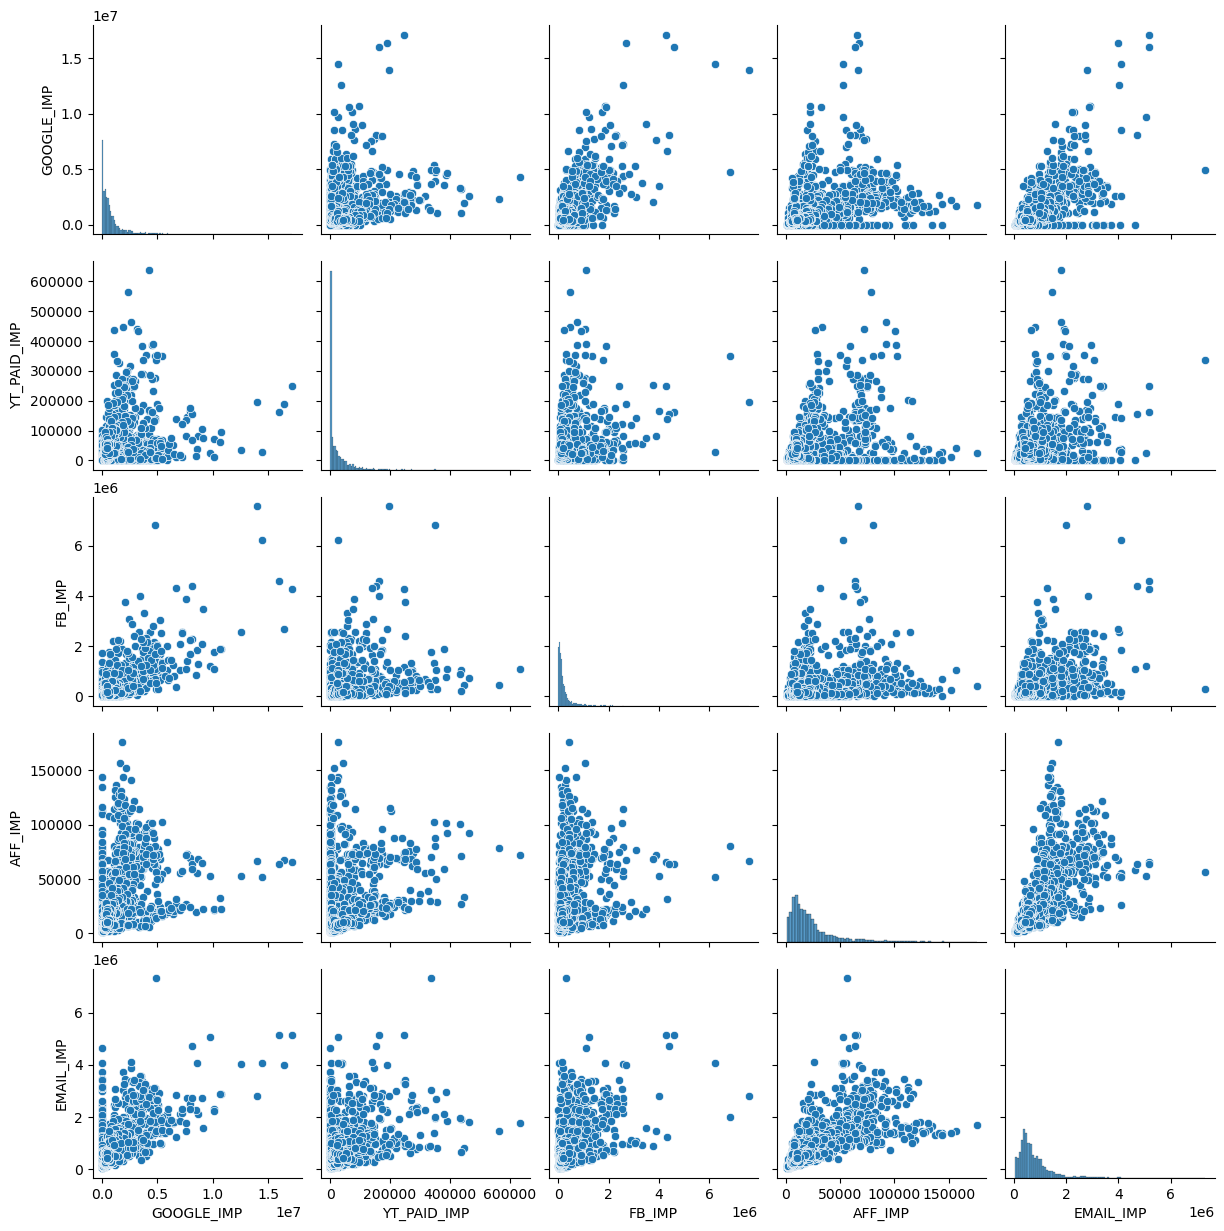

In [71]:
sns.pairplot(data_raw[scatter_cols])

Text(0, 0.5, 'Revenue')

<Figure size 640x480 with 0 Axes>

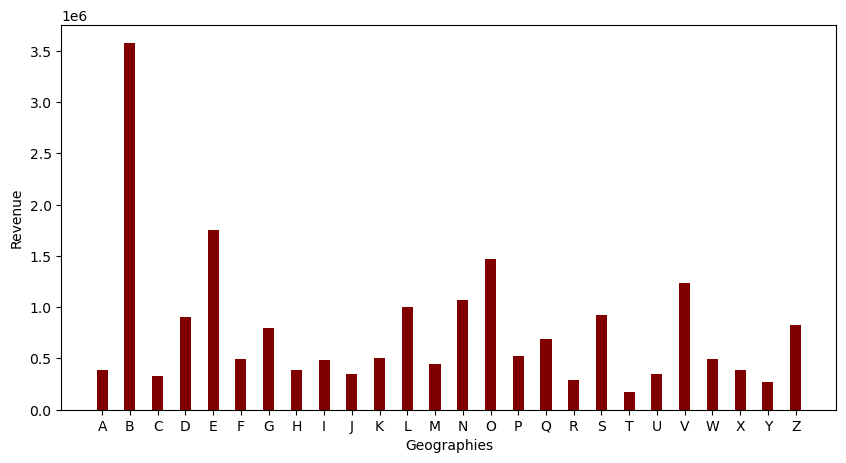

In [9]:
## Exploratory Data Analysis: Revenue by Geography
fig =plt.figure()
fig = plt.figure(figsize = (10, 5))


# creating the bar plot
plt.bar(data_raw['GEO'], data_raw[dependent], color ='maroon', width = 0.4)
plt.xlabel("Geographies")

plt.ylabel("Revenue")

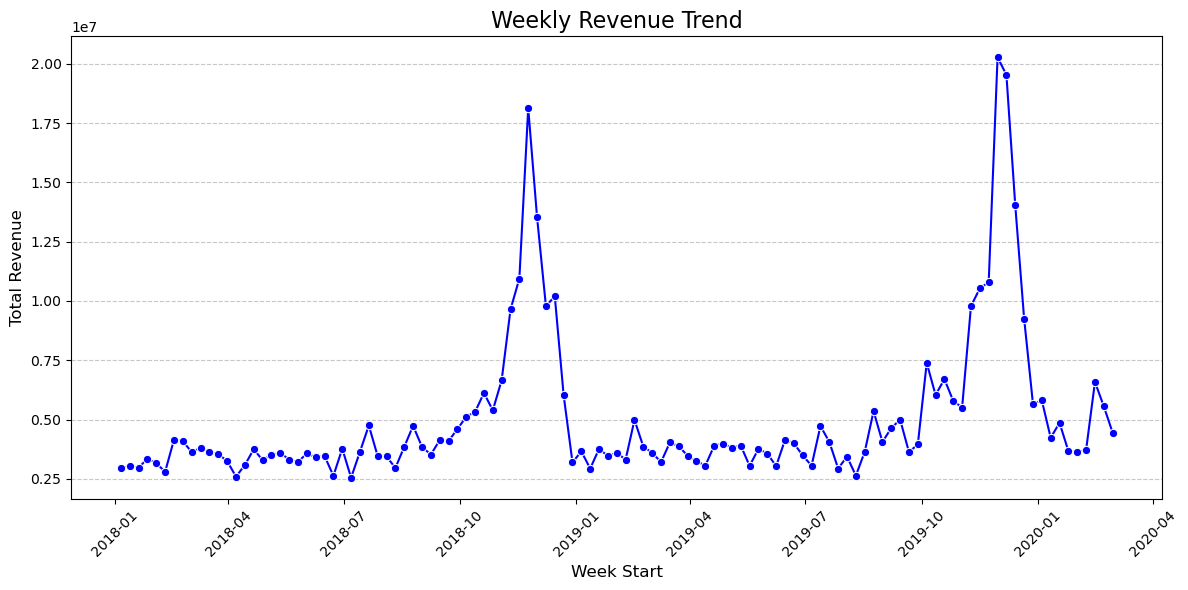

In [77]:
## Checking overall revenue trend
# Group by WEEK_START and sum the revenue
weekly_revenue = data_raw.groupby('WEEK_START', as_index=False)['REVENUE'].sum()

# Plot the result as a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_revenue, x='WEEK_START', y='REVENUE', marker='o', color='blue')

# Customize the plot
plt.title("Weekly Revenue Trend", fontsize=16)
plt.xlabel("Week Start", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

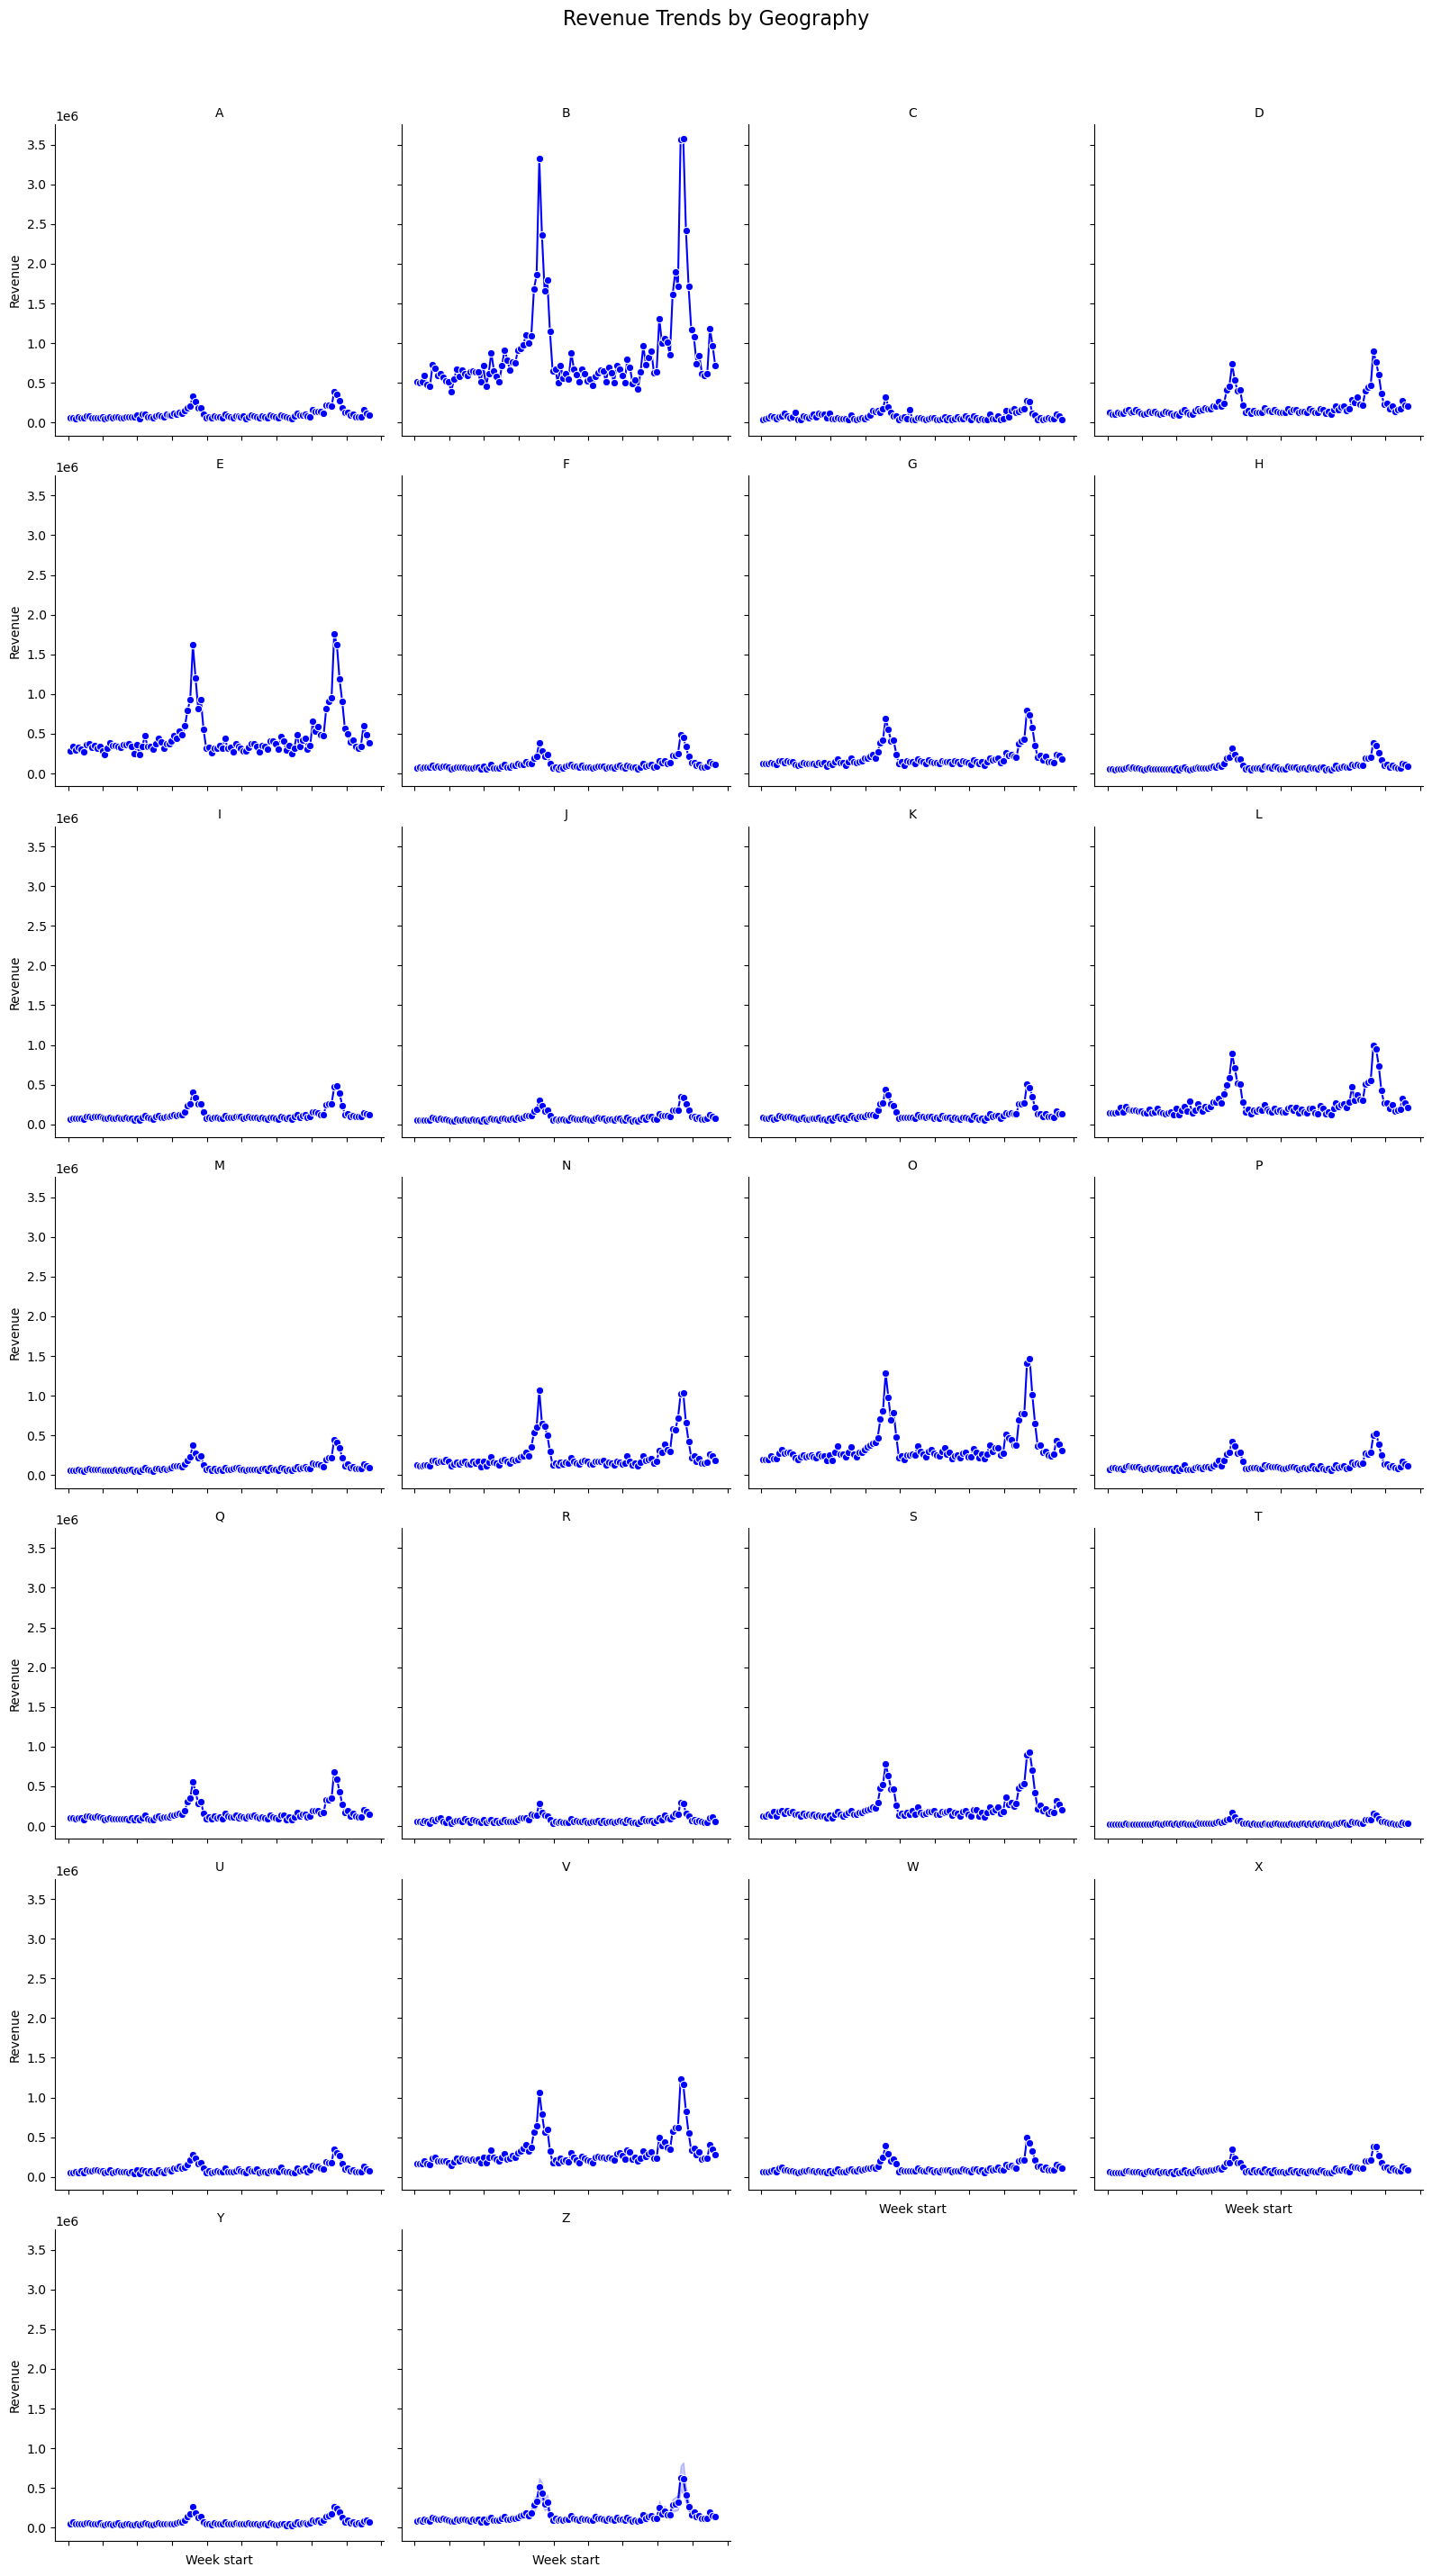

In [76]:
## Checking revenue trend by geography
# Create a FacetGrid for separate line plots for each geography
g = sns.FacetGrid(data_raw, col="GEO", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.lineplot, 'WEEK_START', 'REVENUE', marker='o', color='blue')

# Customize the grid
g.set_titles("{col_name}")  # Set titles to geography names
g.set_axis_labels("Week start", "Revenue")
g.fig.suptitle("Revenue Trends by Geography", fontsize=16, y=1.02)  # Adjust title position
g.set_xticklabels(rotation=45)  # Rotate x-axis labels for clarity
g.tight_layout()

# Show the plots
plt.show()

/var/folders/7y/0wfrv15s4w993n4z1gnxc22c0000gn/T/ipykernel_24753/1966675387.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_raw.corr()


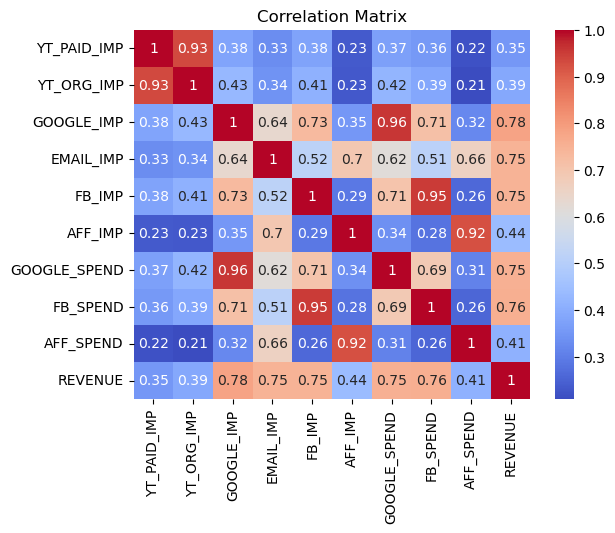

In [10]:
## Correlation and VIF
corr_matrix = data_raw.corr()
## Visualize the correlation matric using heatmaps in seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
## VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(df,column_list):
    # Selecting numerical columns for VIF calculation
    X = df[column_list]

    # Adding a constant for the VIF computation
    X['Intercept'] = 1

    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(vif_data)
vif_calc(data_raw, scatter_cols)

         feature        VIF
0    YT_PAID_IMP   8.034824
1     YT_ORG_IMP   8.384629
2     GOOGLE_IMP  14.376830
3      EMAIL_IMP   3.844647
4         FB_IMP  11.761390
5        AFF_IMP   7.601561
6   GOOGLE_SPEND  12.607323
7       FB_SPEND  11.642116
8      AFF_SPEND   6.961690
9        REVENUE   4.569752
10     Intercept   2.636489


/var/folders/7y/0wfrv15s4w993n4z1gnxc22c0000gn/T/ipykernel_24753/1363527582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


In [12]:
## Eliminating the predictors with high VIF and the ones that are correlated and recomputing the VIF
scatter_cols = list(set(scatter_cols) - set(['GOOGLE_SPEND','FB_SPEND','AFF_SPEND', 'Intercept','REVENUE','YT_ORG_IMP']))
scatter_cols
vif_calc(data_raw, scatter_cols)

       feature       VIF
0   GOOGLE_IMP  2.727178
1  YT_PAID_IMP  1.216514
2       FB_IMP  2.204697
3      AFF_IMP  2.004279
4    EMAIL_IMP  2.972104
5    Intercept  2.610130


/var/folders/7y/0wfrv15s4w993n4z1gnxc22c0000gn/T/ipykernel_24753/1363527582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


In [13]:
## Sales Lags
## Create lagged variables (Lags are relevant if lagged variables have correlation with dependent variable)
lag_cols = []
for lag in range(1, 1):  # Create lags 1, 2, 3
    data_raw[f'REVENUE_LAG_{lag}'] = data_raw.groupby('GEO')['REVENUE'].shift(lag)
    lag_cols.append(f'REVENUE_LAG_{lag}')

## Replace NANs by 0
data_raw = data_raw.fillna(0)
## Check correlation with dependent variable
corr_matrix_lags = data_raw[['REVENUE']+lag_cols].corr()
## Notice that lags are highly correlated with dependent, hence we use lags
corr_matrix_lags

,REVENUE
REVENUE,1.0


In [14]:
data_raw[105:130]

,GEO,WEEK_START,YT_PAID_IMP,YT_ORG_IMP,GOOGLE_IMP,EMAIL_IMP,FB_IMP,AFF_IMP,GOOGLE_SPEND,FB_SPEND,AFF_SPEND,REVENUE
105,A,2020-01-11,9038,19361,294204,408193,130872,6109,3865.84,4122.47,70.10,90981
106,A,2020-01-18,18550,17990,314118,387120,149976,6948,7746.15,2564.59,145.39,105848
107,A,2020-01-25,21626,16855,504923,320358,114312,6684,7361.78,3112.14,201.52,76253
108,A,2020-02-01,24140,21028,565733,997443,39280,5686,9470.37,751.23,135.61,72475
109,A,2020-02-08,24187,22064,574706,365408,161435,4944,10448.16,2724.22,143.50,77613
110,A,2020-02-15,23008,25885,432938,288944,292028,6133,7091.52,9198.88,136.61,168172
111,A,2020-02-22,18726,25271,442591,415592,286872,6760,7807.31,9036.47,112.55,119598
112,A,2020-02-29,13873,22205,430426,300294,148089,6864,9684.59,1865.92,105.02,99357
113,B,2018-01-06,167,782,708,2567848,667172,95360,12.62,20565.58,2209.97,519479
114,B,2018-01-13,552,143,441,3715497,103319,82360,5.95,3184.81,963.61,501041


In [14]:
## Adstocking
## Define adstock transformation function
def adstock(series, decay=0.4):
    result = []
    cumulative = 0
    for value in series:
        cumulative = value + cumulative * decay
        result.append(cumulative)
    return result

## Apply adstock transformation for each geography and each marketing channel
adstock_cols = []
for col in scatter_cols:
    data_raw[f'{col}_Adstock'] = data_raw.groupby('GEO')[col].transform(lambda x: adstock(x, decay=0.2))
    adstock_cols.append(f'{col}_Adstock')


In [15]:
scatter_cols
#data_raw.head()

['GOOGLE_IMP', 'YT_PAID_IMP', 'FB_IMP', 'AFF_IMP', 'EMAIL_IMP']

In [16]:
## Check VIF on the newly created variables - lagged and adstocked
# all_cols = scatter_cols+lag_cols+adstock_cols
# all_cols = scatter_cols+adstock_cols
all_cols = adstock_cols+lag_cols
#all_cols = scatter_cols
vif_calc(data_raw, scatter_cols)

       feature       VIF
0   GOOGLE_IMP  2.727178
1  YT_PAID_IMP  1.216514
2       FB_IMP  2.204697
3      AFF_IMP  2.004279
4    EMAIL_IMP  2.972104
5    Intercept  2.610130


/var/folders/7y/0wfrv15s4w993n4z1gnxc22c0000gn/T/ipykernel_24753/1363527582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


In [20]:
## Transformation of data - Negative Exp or logarithmic
# Function for Logarithmic Transformation
def log_transformation(df,cols,c):
    #c = 0.1  # Scaling factor
    df[[f'log_{col}' for col in cols]] = np.log1p(1 + c * df[cols])
    trans_cols = [f'log_{c}' for c in cols]
    return (df, trans_cols)
# Function for Negative Exponential Transformation
def exp_transformation(df,cols,c):
    #c = 0.1  # Scaling factor
    df[[f'exp_{col}' for col in cols]] = 1 - np.exp(-c * df[cols]) 
    trans_cols = [f'exp_{c}' for c in cols]
    return (df, trans_cols)

# Function for Negative Expo
#data_raw,transformed_cols = log_transformation(data_raw,scatter_cols,0.1)
#data_raw,transformed_cols = exp_transformation(data_raw,scatter_cols,0.1)
#print(transformed_cols)
#all_cols = transformed_cols+lag_cols


In [17]:

## Check VIF on the newly created variables - lagged and adstocked

#all_cols = scatter_cols
vif_calc(data_raw, all_cols)

               feature       VIF
0   GOOGLE_IMP_Adstock  2.979662
1  YT_PAID_IMP_Adstock  1.230401
2       FB_IMP_Adstock  2.530727
3      AFF_IMP_Adstock  2.174050
4    EMAIL_IMP_Adstock  3.350832
5            Intercept  2.660753


/var/folders/7y/0wfrv15s4w993n4z1gnxc22c0000gn/T/ipykernel_24753/1363527582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


In [18]:
#all_cols = scatter_cols
## OLS: Linear Regression
import statsmodels.api as sm
# Final model with updated features
X_final = data_raw[all_cols]
X_final = sm.add_constant(X_final)  # Add intercept
ols_model = sm.OLS(data_raw['REVENUE'], X_final).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2502.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:35:49   Log-Likelihood:                -39537.
No. Observations:                3051   AIC:                         7.909e+04
Df Residuals:                    3045   BIC:                         7.912e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.159e+04   3

In [29]:
scatter_cols

['GOOGLE_IMP', 'YT_PAID_IMP', 'FB_IMP', 'AFF_IMP', 'EMAIL_IMP']

In [47]:
## Sales prediction
def predict_and_calculate_roi(coeff_dict, data, spend_cols, impact_cols, channel_prefix="",channel_suffix="_Adstock"):
    """
    Predict revenue and calculate ROI for each marketing channel based on OLS model.
    
    Parameters:
    - model: Trained OLS regression model (statsmodels)
    - data: DataFrame containing the transformed predictor variables
    - spend_cols: List of spend columns for each channel
    - impact_cols: List of transformed impact columns (log-transformed impressions)
    - channel_prefix: Prefix for log-transformed columns (default="log_")
    
    Returns:
    - predictions: Array of predicted revenues
    - roi_df: DataFrame with ROI calculation for each channel
    """
    # Predict revenue
    predictions = [] #model.predict(data)
    
    # Initialize ROI calculation
    roi_data = []
    
    for spend_col, impact_col in zip(spend_cols, impact_cols):
        # Calculate Marginal Effect (coefficient of the transformed impact variable)
        coeff = coeff_dict[channel_prefix + impact_col + channel_suffix]
        
        # Calculate ROI: (Incremental Revenue / Spend)
        incremental_revenue = np.sum(coeff * data[impact_col])
        #avg_spend = data[spend_col].mean()
        total_spend = np.sum(data[spend_col])
        if(impact_col == 'GOOGLE_IMP'):
            coeff_YT_IMP = coeff_dict[channel_prefix + 'YT_PAID_IMP' + channel_suffix]
            coeff_EMAIL_IMP = coeff_dict[channel_prefix + 'EMAIL_IMP' + channel_suffix]
            inc_revenue_YT_IMP = np.sum(coeff_YT_IMP * data[channel_prefix +'YT_PAID_IMP'+ channel_suffix])
            inc_revenue_EMAIL_IMP = np.sum(coeff_EMAIL_IMP * data[channel_prefix +'EMAIL_IMP'+ channel_suffix])
            incremental_revenue = incremental_revenue+(inc_revenue_YT_IMP+inc_revenue_EMAIL_IMP)
        #roi = incremental_revenue / avg_spend if avg_spend != 0 else np.nan
        roi = incremental_revenue / total_spend if total_spend != 0 else np.nan
        
        print(incremental_revenue)
        roi_data.append({
            "Channel": impact_col,
            "Coefficient": coeff,
            "Total Spend": total_spend,
            "Incremental Revenue": incremental_revenue,
            "ROI": roi
        })
    
    # Convert ROI data to a DataFrame
    roi_df = pd.DataFrame(roi_data)
    
    return predictions, roi_df

# - A trained OLS model named `ols_model`
# - Data with spend and impact columns in `data_raw`
# - List of spend columns and corresponding impact columns
spend_columns = ["FB_SPEND", "GOOGLE_SPEND", "AFF_SPEND"]
impact_columns = ["FB_IMP", "GOOGLE_IMP", "AFF_IMP"]

# Predict revenue and calculate ROI
predictions, roi_df = predict_and_calculate_roi(dict(ols_model.params), data_raw, spend_columns, impact_columns)

# Display results
# print("Predicted Revenue:")
# print(predictions)

print("\nROI Calculation:")
print(roi_df)

125194074.86471198
467435651.8578719
-38615469.71071036

ROI Calculation:
      Channel  Coefficient  Total Spend  Incremental Revenue        ROI
0      FB_IMP      0.15247  17419061.18         1.251941e+08   7.187188
1  GOOGLE_IMP      0.04052  46627629.57         4.674357e+08  10.024864
2     AFF_IMP     -0.55243   1477124.21        -3.861547e+07 -26.142331


In [45]:
dict(ols_model.params)

{'const': -11586.136327914406,
 'GOOGLE_IMP_Adstock': 0.04051971075397423,
 'YT_PAID_IMP_Adstock': -0.10740610863821264,
 'FB_IMP_Adstock': 0.15247002735488266,
 'AFF_IMP_Adstock': -0.5524295662760402,
 'EMAIL_IMP_Adstock': 0.1276085964222197}

In [39]:
roi_df

,Channel,Coefficient,Total Spend,Incremental Revenue,ROI
0,FB_IMP,0.15247,17419061.18,125194074.864712,7.187188
1,GOOGLE_IMP,0.04052,46627629.57,0 1.095984e+08 1 1.096271e+08 2 ...,0 2.350503 1 2.351120 2 2.35...
2,AFF_IMP,-0.55243,1477124.21,-38615469.71071,-26.142331


In [59]:
## Result analysis

['GOOGLE_IMP_Adstock',
 'YT_PAID_IMP_Adstock',
 'FB_IMP_Adstock',
 'AFF_IMP_Adstock',
 'EMAIL_IMP_Adstock']

In [49]:
## Using Ridge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Prepare features and target
X_final = data_raw[all_cols]  # Replace `all_cols` with your list of final features
y = data_raw['REVENUE']

# Standardize predictors to ensure regularization behaves consistently
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Ridge Regression with Cross-Validation
ridge_model = Ridge(alpha=530)  # alpha is the regularization strength
ridge_model.fit(X_scaled, y)

# Display coefficients
ridge_coefficients = ridge_model.coef_
ridge_coeff_dict={}
print("Ridge Coefficients:")
for feature, coef in zip(all_cols, ridge_coefficients):
    print(f"{feature}: {coef}")
    ridge_coeff_dict.update({feature: coef})

# Cross-validation score
cv_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {np.mean(cv_scores):.4f}")

Ridge Coefficients:
GOOGLE_IMP_Adstock: 68404.96333955083
YT_PAID_IMP_Adstock: 80.35366668176005
FB_IMP_Adstock: 75937.18129456631
AFF_IMP_Adstock: 2136.477919524222
EMAIL_IMP_Adstock: 74264.61810350974
Cross-validated R-squared: 0.6978


In [50]:
ridge_coefficients

array([68404.96333955,    80.35366668, 75937.18129457,  2136.47791952,
       74264.61810351])

In [51]:
ridge_coeff_dict

{'GOOGLE_IMP_Adstock': 68404.96333955083,
 'YT_PAID_IMP_Adstock': 80.35366668176005,
 'FB_IMP_Adstock': 75937.18129456631,
 'AFF_IMP_Adstock': 2136.477919524222,
 'EMAIL_IMP_Adstock': 74264.61810350974}

In [53]:
predictions, roi_df_ridge = predict_and_calculate_roi(ridge_coeff_dict, data_raw, spend_columns, impact_columns)


62352485435575.64
399981872847720.06
149342293435.04144


In [54]:
roi_df_ridge

,Channel,Coefficient,Total Spend,Incremental Revenue,ROI
0,FB_IMP,75937.181295,17419061.18,6.235249e+13,3.579555e+06
1,GOOGLE_IMP,68404.963340,46627629.57,3.999819e+14,8.578216e+06
2,AFF_IMP,2136.477920,1477124.21,1.493423e+11,1.011034e+05


In [66]:
rhs_string = (' + ').join(all_cols)
formula = "REVENUE ~ " + rhs_string + " + (1 | GEO)"
formula

'REVENUE ~ GOOGLE_IMP_Adstock + YT_PAID_IMP_Adstock + FB_IMP_Adstock + AFF_IMP_Adstock + EMAIL_IMP_Adstock + (1 | GEO)'

In [69]:
from statsmodels.regression.mixed_linear_model import MixedLM

# Ensure GEOGRAPHY is treated as a categorical variable
data_raw['GEO'] = data_raw['GEO'].astype('category')

# Define predictors (independent variables) and dependent variable
predictors = all_cols
X_df = data_raw[predictors]
X_df['Intercept'] = 1  # Add an intercept column
y = data_raw['REVENUE']

# Random slopes without random intercept
# Prepare the random effects design matrix (only the slopes for each group)
random_effects_slopes = data_raw[predictors]

# Fit the mixed-effects model with random intercepts for geographies
mixed_model = MixedLM(endog=y, exog=X_df, groups=data_raw['GEO'], exog_re=X_df['Intercept'])
# Fit the Mixed Linear Model with random slopes
#mixed_model = MixedLM(
    endog=y, 
    exog=X_df, 
    groups=data_raw['GEO'], 
    exog_re=random_effects_slopes  # Random slopes
)
mixed_fit = mixed_model.fit()

# Print the summary
print(mixed_fit.summary())

/var/folders/7y/0wfrv15s4w993n4z1gnxc22c0000gn/T/ipykernel_24753/1324820904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Intercept'] = 1  # Add an intercept column
/Users/rahularora/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/rahularora/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                               Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              REVENUE        
No. Observations:              3051                 Method:                          REML           
No. Groups:                    26                   Scale:                           8039271254.5234
Min. group size:               113                  Log-Likelihood:                  -40560.3244    
Max. group size:               226                  Converged:                       Yes            
Mean group size:               117.3                                                                
----------------------------------------------------------------------------------------------------
                                                 Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------------------------------
GOOGLE_IMP_Adstock    

/Users/rahularora/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
